# Testing for Generating Randomized Geological Histories

In [320]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

from structgeo.model import geo
import structgeo.plot as geovis
from structgeo.model import history as geohistory
import structgeo.probability as rv

pv.set_jupyter_backend('static')

In [321]:
# Set random seed for reproducibility
# random_seed = 1234
# np.random.seed(random_seed)

In [322]:
# Start with some model specifications
# Randomize the bounds size between 10 and 100
resolution = 128
max_x = float(np.random.randint(10, 100))
min_x = - max_x
model_size = max_x - min_x
bounds = (min_x,max_x)
model = geo.GeoModel(bounds, resolution)
print(f"Model created with bounds {bounds} and resolution {resolution}")

Model created with bounds (-85.0, 85.0) and resolution 128


In [323]:
# Make an origin generator for generating feature origins
def get_origin_generator(bounds):
    def origin_generator():
        return rv.random_point_in_ellipsoid(bounds)
    return origin_generator

origin_generator = get_origin_generator(bounds)

for i in range(5):
    origin = origin_generator()
    print(f"Origin {i}: {origin}")

Origin 0: (13.74957443335024, -20.25275526613478, 3.8884294242527417)
Origin 1: (-25.179270506847374, 20.600896380433774, -24.187740866850717)
Origin 2: (-5.356268900476533, 3.866824883385184, -28.12744720823359)
Origin 3: (-12.544596590552754, -34.86901608967586, -44.92827985096429)
Origin 4: (-13.012659434879465, -0.9350368017075431, -50.32847435991427)


In [324]:
# random bedrock in lower 1/4 of model
base = min_x + model_size / 4 + np.random.normal(0, model_size / 10)
value = 3
bedrock = geo.Bedrock(base,value)
print(f"Bedrock defined at {base} with value {value}")

Bedrock defined at -42.90445037608353 with value 3


In [325]:
# Random sedimentary layer filled to around 1/2 of the model
height = base + model_size / 3 + np.random.normal(0, model_size / 10)
height = max(height, base + model_size/10)
avg_thickness = (height-base)/10
print(f"Average thickness of sedimentary layer is {avg_thickness}")
sediment = geo.Sedimentation(height=height, value_list = range(4,100), thickness_callable = lambda: np.random.lognormal(np.log(avg_thickness),1))
print(f"Sedimentary layer defined at {height} with values {sediment.value_list}")

Average thickness of sedimentary layer is 4.589249954843771
Sedimentary layer defined at 2.9880491723541773 with values range(4, 100)


In [326]:
# Add random dike
strike = rv.random_angle_degrees()
dip = np.random.uniform(60,120)
width = np.random.uniform(2,model_size/5)
origin = origin_generator()
value = 0

dike = geo.Dike(strike=strike, dip=dip, width=width, origin=origin, value=value)

print(f"Dike defined with strike {strike}, dip {dip}, width {width}, origin {origin} and value {value}")

Dike defined with strike 265.2252549195732, dip 63.723202512523166, width 19.488354207063445, origin (12.761879000202054, 10.349105755846242, 73.86035997700789) and value 0


In [327]:
# Add random tilt
strike = rv.random_angle_degrees()
dip = np.random.uniform(0,35)
origin = origin_generator()
tilt = geo.Tilt(strike=strike, dip=dip, origin=origin)

In [328]:
# add random fold
strike = rv.random_angle_degrees()
dip = np.random.uniform(60,120)
rake = rv.random_angle_degrees()
origin = origin_generator()
amplitude = np.random.uniform(0, model_size/8)
period = np.random.uniform(model_size/2, model_size*4)
periodic_func = rv.fourier_series_wave(num_harmonics=8)
fold = geo.Fold(strike=strike, dip=dip, rake=rake, origin=origin, amplitude=amplitude, period=period, periodic_func=periodic_func)


In [329]:
# Add random fault
strike = rv.random_angle_degrees()
dip = np.random.uniform(60,100)
rake = np.random.uniform(0,180)
amplitude = np.random.uniform(2, model_size/20)
origin = origin_generator()
fault = geo.Fault(strike=strike, dip=dip, rake=rake, origin=origin, amplitude=amplitude)


Target height: 42.41


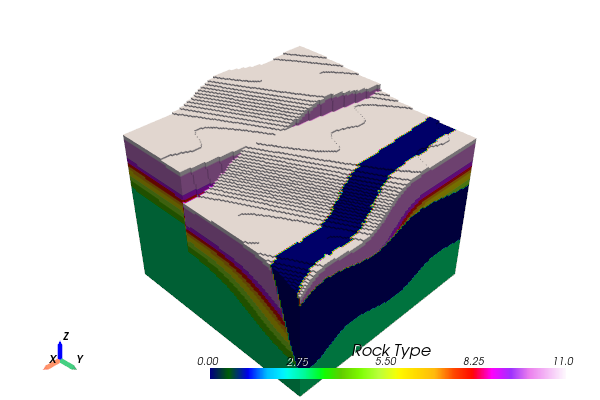

In [330]:
model.clear_history()
model.add_history([bedrock, sediment, dike, tilt, fold, fault])
model.compute_model()
model.renormalize_height(auto = True)
p = geovis.volview(model)
p.show(window_size=[600,400])

In [334]:
def generate_model():
    # Start with some model specifications
    # Randomize the bounds size between 10 and 100
    resolution = 128
    max_x = 10
    min_x = - max_x
    model_size = max_x - min_x
    bounds = (min_x,max_x)
    model = geo.GeoModel(bounds, resolution)
    print(f"Model created with bounds {bounds} and resolution {resolution}")

    # Make an origin generator for generating feature origins
    def get_origin_generator(bounds):
        def origin_generator():
            return rv.random_point_in_ellipsoid(bounds)
        return origin_generator

    origin_generator = get_origin_generator(bounds)

    for i in range(5):
        origin = origin_generator()
        
        # random bedrock in lower 1/4 of model
    base = min_x + model_size / 4 + np.random.normal(0, model_size / 10)
    value = 3
    bedrock = geo.Bedrock(base,value)
    print(f"Bedrock defined at {base} with value {value}")

    # Random sedimentary layer filled to around 1/2 of the model
    height = base + model_size / 3 + np.random.normal(0, model_size / 10)
    height = max(height, base + model_size/10)
    avg_thickness = (height-base)/10
    print(f"Average thickness of sedimentary layer is {avg_thickness}")
    sediment = geo.Sedimentation(height=height, value_list = range(4,100), thickness_callable = lambda: np.random.lognormal(np.log(avg_thickness),1))
    print(f"Sedimentary layer defined at {height} with values {sediment.value_list}")

    # Add random dike
    strike = rv.random_angle_degrees()
    dip = np.random.uniform(60,120)
    width = np.random.uniform(2,model_size/5)
    origin = origin_generator()
    value = 0

    dike = geo.Dike(strike=strike, dip=dip, width=width, origin=origin, value=value)

    print(f"Dike defined with strike {strike}, dip {dip}, width {width}, origin {origin} and value {value}")

    # Add random tilt
    strike = rv.random_angle_degrees()
    dip = np.random.uniform(0,35)
    origin = origin_generator()
    tilt = geo.Tilt(strike=strike, dip=dip, origin=origin)

    # add random fold
    strike = rv.random_angle_degrees()
    dip = np.random.uniform(60,120)
    rake = rv.random_angle_degrees()
    origin = origin_generator()
    amplitude = np.random.uniform(0, model_size/8)
    period = np.random.uniform(model_size/2, model_size*4)
    periodic_func = rv.fourier_series_wave(num_harmonics=8)
    fold = geo.Fold(strike=strike, dip=dip, rake=rake, origin=origin, amplitude=amplitude, period=period, periodic_func=periodic_func)

    # Add random fault
    strike = rv.random_angle_degrees()
    dip = np.random.uniform(60,100)
    rake = np.random.uniform(0,180)
    amplitude = np.random.uniform(2, model_size/20)
    origin = origin_generator()
    fault = geo.Fault(strike=strike, dip=dip, rake=rake, origin=origin, amplitude=amplitude)

    # Gen
    model.clear_history()
    model.add_history([bedrock, sediment, dike, tilt, fold, fault])
    model.compute_model()
    model.renormalize_height(auto = True)
    return model

In [335]:
from structgeo.data.model_reviewer import ModelReviewer
DEFAULT_BASE_DIR = "../single_fault"

reviewer = ModelReviewer(generate_model_func=generate_model, base_dir=DEFAULT_BASE_DIR)
reviewer.start_review()

Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -7.939522232220107 with value 3
Average thickness of sedimentary layer is 0.9438023484568155
Sedimentary layer defined at 1.4985012523480483 with values range(4, 100)
Dike defined with strike 342.2927300566095, dip 82.80603006634557, width 2.0275029621558436, origin (0.5733400110018875, -1.2037871149450057, -1.4175080580207198) and value 0
Target height: 7.20


Output()

Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -4.485941352181795 with value 3
Average thickness of sedimentary layer is 0.7617602219998141
Sedimentary layer defined at 3.1316608678163447 with values range(4, 100)
Dike defined with strike 333.73242722011867, dip 99.50185098119547, width 3.0724880732024245, origin (-8.532876204981871, -4.077261621639562, -0.006671849120557542) and value 0
Target height: 6.19


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -5.529347653283813 with value 3
Average thickness of sedimentary layer is 0.7955663692220227
Sedimentary layer defined at 2.426316038936414 with values range(4, 100)
Dike defined with strike 60.39094701823997, dip 93.11053229098951, width 3.666760542799083, origin (0.028587713968763123, 0.0337118642203344, -0.21481210609569368) and value 0
Target height: 5.43


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -1.5143550137044879 with value 3
Average thickness of sedimentary layer is 0.6649649932395316
Sedimentary layer defined at 5.135294918690828 with values range(4, 100)
Dike defined with strike 214.7538472504011, dip 112.8659502009657, width 3.613861618772591, origin (7.318353605438766, 3.9000923124300604, -5.37290205872893) and value 0
Target height: 5.47


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -1.8655034426540764 with value 3
Average thickness of sedimentary layer is 0.6741219363885446
Sedimentary layer defined at 4.875715921231369 with values range(4, 100)
Dike defined with strike 324.81067042007027, dip 107.57523019926506, width 3.6293214303743575, origin (0.1087657344551838, 0.244642316202195, 0.6494480685680598) and value 0
Target height: 6.03


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -5.596244642697527 with value 3
Average thickness of sedimentary layer is 0.7180651146050935
Sedimentary layer defined at 1.584406503353408 with values range(4, 100)
Dike defined with strike 220.21559913163233, dip 82.09332628778257, width 3.540070324740658, origin (0.7906462418405275, -0.36218704262967627, 4.684373735108204) and value 0
Target height: 4.26


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -5.744091624419725 with value 3
Average thickness of sedimentary layer is 0.9743151944233877
Sedimentary layer defined at 3.9990603198141503 with values range(4, 100)
Dike defined with strike 302.4555401830051, dip 75.87246775046317, width 3.0709528216560926, origin (0.008660966084666138, 0.009116757026597928, -2.2537586446191797) and value 0
Target height: 5.39


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -1.6087826759478827 with value 3
Average thickness of sedimentary layer is 0.7648738812375582
Sedimentary layer defined at 6.039956136427699 with values range(4, 100)
Dike defined with strike 40.19068389565497, dip 74.0878007657044, width 2.9208365702145596, origin (1.4147359404098916, -4.8391592354308255, 2.479064309306784) and value 0
Target height: 6.74


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -4.4498263269331835 with value 3
Average thickness of sedimentary layer is 0.6779613226028331
Sedimentary layer defined at 2.3297868990951476 with values range(4, 100)
Dike defined with strike 128.18103395238728, dip 92.15406124715773, width 2.7027404735440252, origin (0.6977756607564136, 4.28737110202564, -2.63305106178136) and value 0
Target height: 3.84


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -3.2116509876244623 with value 3
Average thickness of sedimentary layer is 0.966428523973088
Sedimentary layer defined at 6.452634252106417 with values range(4, 100)
Dike defined with strike 331.14211628647803, dip 91.6067032952514, width 3.410487240947228, origin (-0.9512163890598508, -7.138883371581918, -0.06259629939141383) and value 0
Target height: 6.26


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -8.222510726956326 with value 3
Average thickness of sedimentary layer is 0.4666743897546842
Sedimentary layer defined at -3.5557668294094835 with values range(4, 100)
Dike defined with strike 319.4566603701792, dip 78.70689636128375, width 3.682517702659974, origin (2.6443875223638202, 1.3381823097499201, -0.9853155272286062) and value 0
Target height: 6.62


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -7.394451774991708 with value 3
Average thickness of sedimentary layer is 0.513913505417557
Sedimentary layer defined at -2.2553167208161375 with values range(4, 100)
Dike defined with strike 193.63749937836528, dip 118.5973323614108, width 2.8899342317783194, origin (-2.0899184754779436, -5.524085885283569, 3.6982221708054435) and value 0
Target height: 6.35


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -5.704718963020964 with value 3
Average thickness of sedimentary layer is 0.7340060392493071
Sedimentary layer defined at 1.6353414294721058 with values range(4, 100)
Dike defined with strike 184.2551492738917, dip 103.03052668305973, width 2.7782442497214603, origin (-3.3070792902787844, 0.6198021581958006, -5.112989262978949) and value 0
Target height: 4.79


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -1.799589589431832 with value 3
Average thickness of sedimentary layer is 0.47264184858222646
Sedimentary layer defined at 2.9268288963904334 with values range(4, 100)
Dike defined with strike 256.6525638584138, dip 87.94778230074783, width 3.498478651186149, origin (4.404545876033438, -2.716256621372713, 0.7159609772796011) and value 0
Target height: 4.76


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -7.6789241536191195 with value 3
Average thickness of sedimentary layer is 0.7173399798286625
Sedimentary layer defined at -0.5055243553324943 with values range(4, 100)
Dike defined with strike 175.1870280063333, dip 83.74471460139344, width 2.2146237609671315, origin (0.015213367113096328, 0.9363171522541398, -0.3054408755289523) and value 0
Target height: 7.90


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -8.878826609385868 with value 3
Average thickness of sedimentary layer is 0.6357328411031371
Sedimentary layer defined at -2.5214981983544975 with values range(4, 100)
Dike defined with strike 163.1559211607619, dip 92.9923006286976, width 2.7173991772692716, origin (0.7620624199197392, -0.5854127606903965, -4.19011569414031) and value 0
Target height: 5.35


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -5.380089347820774 with value 3
Average thickness of sedimentary layer is 0.9233755424404162
Sedimentary layer defined at 3.8536660765833886 with values range(4, 100)
Dike defined with strike 217.68799341527054, dip 61.6373160559232, width 3.518257673741293, origin (2.8792548066378036, -6.055935510139916, 2.640472633643709) and value 0
Target height: 4.71


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -1.1907096161951647 with value 3
Average thickness of sedimentary layer is 0.715233432421627
Sedimentary layer defined at 5.961624708021105 with values range(4, 100)
Dike defined with strike 324.0026062042504, dip 90.50688642700187, width 2.7707427928543584, origin (-0.4509720687414875, -1.2844723677868373, -3.4423747311984116) and value 0
Target height: 5.56


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -5.6400131188029015 with value 3
Average thickness of sedimentary layer is 0.8802981277355897
Sedimentary layer defined at 3.1629681585529963 with values range(4, 100)
Dike defined with strike 305.8548016581771, dip 64.65041345993838, width 3.356289421001944, origin (3.7284322327973616, 0.6327486339073702, -3.6454767673742836) and value 0
Target height: 5.63


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -5.383795038129291 with value 3
Average thickness of sedimentary layer is 0.9026191740842602
Sedimentary layer defined at 3.6423967027133113 with values range(4, 100)
Dike defined with strike 195.43704803191167, dip 111.77641667654294, width 3.929858330269049, origin (1.7648577188213974, 2.8313900938905996, 0.9762188778252072) and value 0
Target height: 5.88


Model saved to ./single_fault\model_0.pkl
